# Data Cleaning

## 1. Operazioni preliminari

> Installazione dipendenze necessarie

In [1]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=65fe408e5880a69317ffbdf34d0767e78874fe20910d73d6a7b2489d4e50f20e
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


> Importazione delle librerie

In [2]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
import numpy as np

> Montaggio di Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> Lettura del dataset

In [4]:
# drive path
csv_path = '/content/drive/MyDrive/Progetto_FDSML/tiktok_accounts.csv'

In [5]:
# local path
csv_path = './datasets/tiktok_accounts.csv'

In [5]:
df = pd.read_csv(csv_path)
df.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake
0,279,0,564,0,0,0,0,0,Tik Toker,False,No bio yet,0,gyzituvigy542,False,True
1,1198,71,9980,0,0,0,0,0,BEULAH,True,NaN,0,tshphjtowl2401583tbww,False,True
2,2968,596,1123,2062,266,0,0,0,Lello27,False,NaN,0,aristanismamojadanuoro,False,False
3,2351,200,818,435,36,0,0,0,clemevitale,False,NaN,0,clemevitale,False,False
4,40300,1100000,52,10000000,720,0,3,1,Saher Monther,False,YouTuber star ⭐️,0,sahermonther,True,False


## 2. Esplorazione dei dati

In [6]:
# Verifico quante istanze ci sono nel dataset
len(df)

10043

In [7]:
# Stampo informazioni sul dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        10043 non-null  int64 
 1   followerCount    10043 non-null  int64 
 2   followingCount   10043 non-null  int64 
 3   heartCount       10043 non-null  int64 
 4   videoCount       10043 non-null  int64 
 5   commentSetting   10043 non-null  int64 
 6   downloadSetting  10043 non-null  int64 
 7   duetSetting      10043 non-null  int64 
 8   nickname         10043 non-null  object
 9   openFavorite     10043 non-null  bool  
 10  signature        6536 non-null   object
 11  stitchSetting    10043 non-null  int64 
 12  uniqueId         10043 non-null  object
 13  verified         10043 non-null  bool  
 14  fake             10043 non-null  bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 971.1+ KB


In [8]:
# Descrivo gli attributi numerici del dataset
df.describe()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,stitchSetting
count,10043.000000,1.004300e+04,10043.000000,1.004300e+04,10043.000000,10043.000000,10043.000000,10043.000000,10043.000000
mean,3893.421189,2.218839e+05,1043.106641,3.978432e+06,66.211889,0.009161,0.146968,0.089316,0.093100
std,17247.832989,2.177557e+06,2186.721075,3.812251e+07,311.690438,0.136519,0.647570,0.479087,0.489071
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,2.000000e+00,176.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,358.000000,5.400000e+01,533.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,761.000000,5.120000e+02,686.000000,9.060000e+02,17.000000,0.000000,0.000000,0.000000,0.000000
max,386100.000000,8.230000e+07,10000.000000,1.400000e+09,9300.000000,3.000000,3.000000,3.000000,3.000000


>

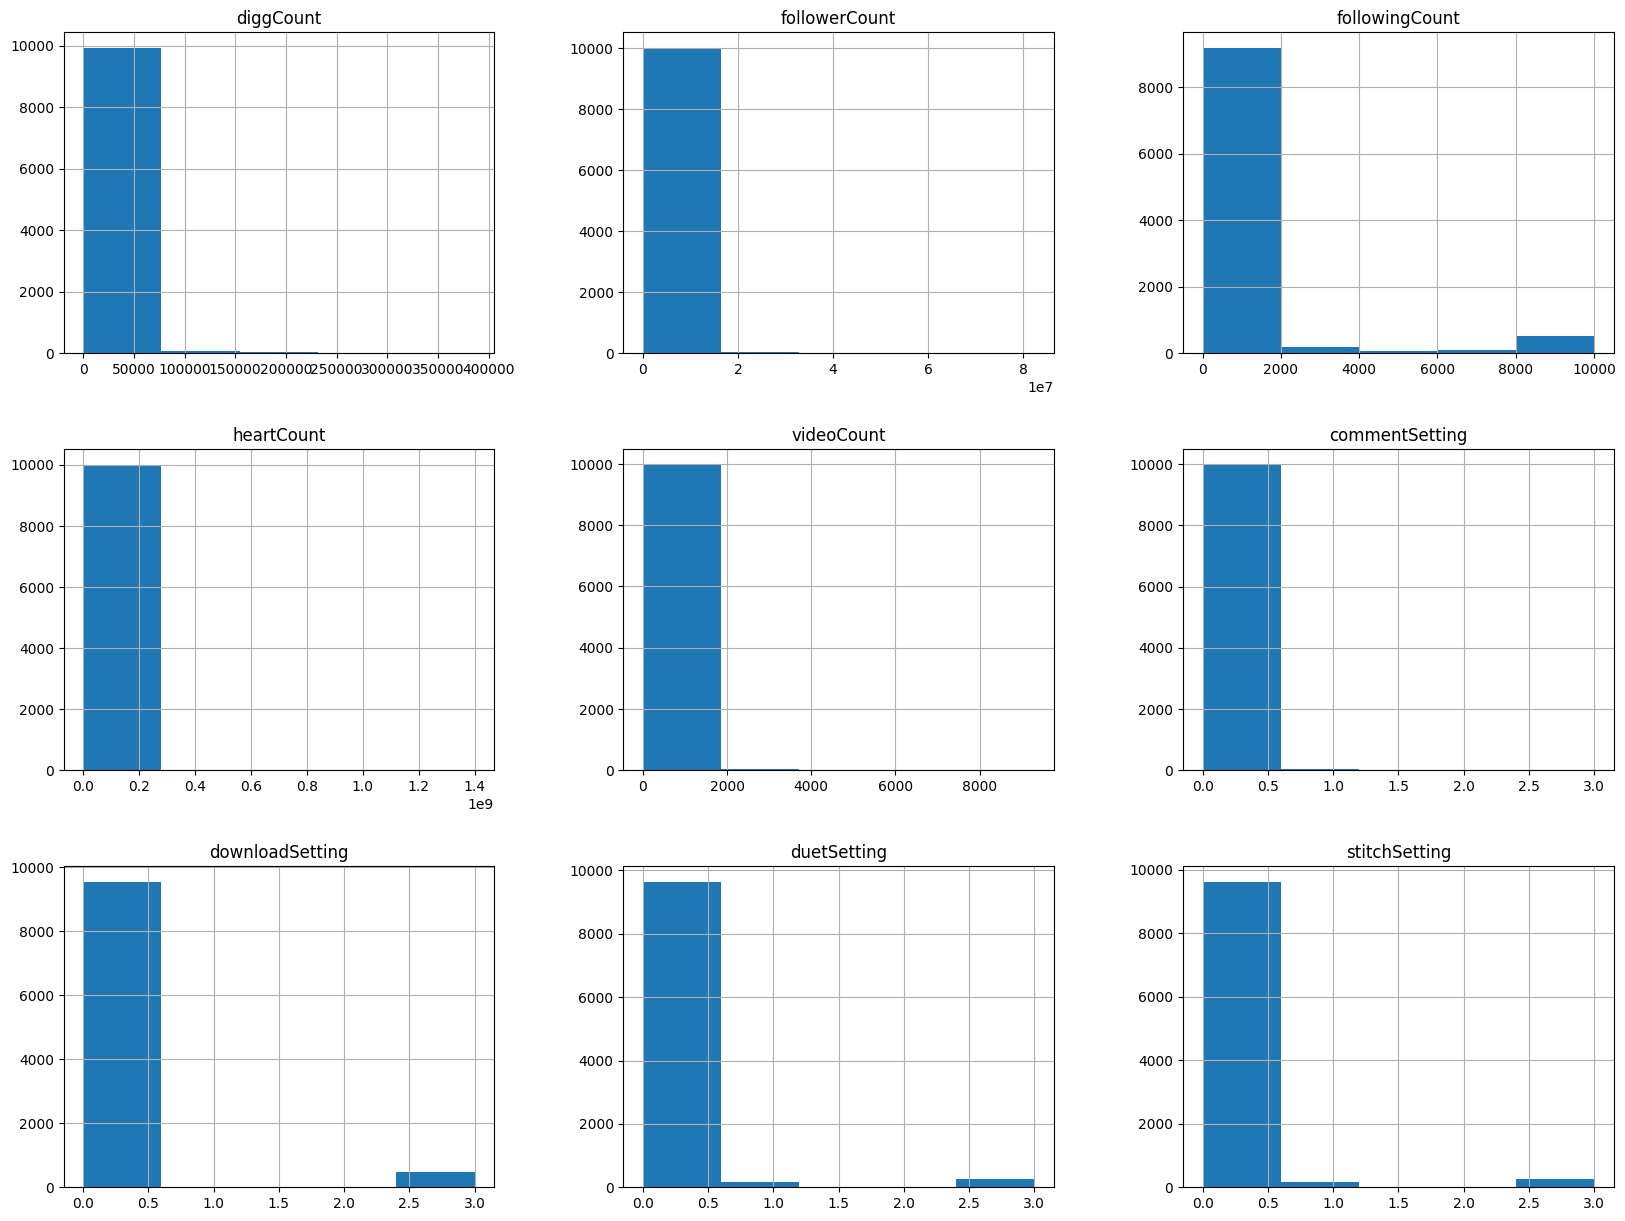

In [9]:
# Stampo i grafici relativi agli attributi numerici
# bins indica il numero totale di intervalli equidistanti in cui suddividere i dati
%matplotlib inline
df.hist(bins=5, figsize=(20,15))
plt.show()

In [10]:
# Stampo massimo e minimo di ogni attributo
print("Massimo Digg Count:", df['diggCount'].max())
print("Minimo Digg Count:", df['diggCount'].min())

print("Massimo Follower Count:", df['followerCount'].max())
print("Minimo Follower Count:", df['followerCount'].min())

print("Massimo Following Count:", df['followingCount'].max())
print("Minimo Following Count:", df['followingCount'].min())

print("Massimo Heart Count:", df['heartCount'].max())
print("Minimo Heart Count:", df['heartCount'].min())

print("Massimo Video Count:", df['videoCount'].max())
print("Minimo Video Count:", df['videoCount'].min())

print("Massimo Comment Setting:", df['commentSetting'].max())
print("Minimo Comment Setting:", df['commentSetting'].min())

print("Massimo Download Setting:", df['downloadSetting'].max())
print("Minimo Download Setting:", df['downloadSetting'].min())

print("Massimo Duet Setting:", df['duetSetting'].max())
print("Minimo Duet Setting:", df['duetSetting'].min())

print("Massimo Stitch Setting:", df['stitchSetting'].max())
print("Minimo Stitch Setting:", df['stitchSetting'].min())

Massimo Digg Count: 386100
Minimo Digg Count: 0
Massimo Follower Count: 82300000
Minimo Follower Count: 0
Massimo Following Count: 10000
Minimo Following Count: 0
Massimo Heart Count: 1400000000
Minimo Heart Count: 0
Massimo Video Count: 9300
Minimo Video Count: 0
Massimo Comment Setting: 3
Minimo Comment Setting: 0
Massimo Download Setting: 3
Minimo Download Setting: 0
Massimo Duet Setting: 3
Minimo Duet Setting: 0
Massimo Stitch Setting: 3
Minimo Stitch Setting: 0


> Matrice di correlazione per capire quali sono le variabili effettivamente correlate da quelle che non lo sono.

In [11]:
# Seleziono solo le colonne numeriche, dato che su quelle si può calcolare la matrice di correlazione
selected_data = df[['diggCount', 'followerCount', 'followingCount', 'heartCount',
                      'videoCount', 'commentSetting', 'downloadSetting', 'duetSetting', 'stitchSetting', 'fake']]
corr_matrix = selected_data.corr()
corr_matrix['fake'].sort_values(ascending=False)

fake               1.000000
followingCount     0.250169
commentSetting    -0.067205
followerCount     -0.102048
heartCount        -0.104520
duetSetting       -0.186717
stitchSetting     -0.190654
diggCount         -0.204800
videoCount        -0.210097
downloadSetting   -0.227304
Name: fake, dtype: float64

I valori vicini allo zero sono quelli meno correlati, per cui si può dire che *commentSetting* non è correlato. Si valuterà dopo la pulizia completa se è il caso di eliminarlo definitivamente.

> Creo una copia del dataset originale, in modo da non modificarlo direttamente

In [14]:
df_copy = df

> Mostro la correlazione di una selezione di attributi una per una.

In [12]:
# Creo una nuova label target in formato numerico per poter vedere la correlazione
df_copy['fakeNum'] = np.where(df_copy['fake'] == False, 0, 1)

array([[<Axes: xlabel='followerCount', ylabel='followerCount'>,
        <Axes: xlabel='followingCount', ylabel='followerCount'>,
        <Axes: xlabel='heartCount', ylabel='followerCount'>,
        <Axes: xlabel='videoCount', ylabel='followerCount'>,
        <Axes: xlabel='fakeNum', ylabel='followerCount'>],
       [<Axes: xlabel='followerCount', ylabel='followingCount'>,
        <Axes: xlabel='followingCount', ylabel='followingCount'>,
        <Axes: xlabel='heartCount', ylabel='followingCount'>,
        <Axes: xlabel='videoCount', ylabel='followingCount'>,
        <Axes: xlabel='fakeNum', ylabel='followingCount'>],
       [<Axes: xlabel='followerCount', ylabel='heartCount'>,
        <Axes: xlabel='followingCount', ylabel='heartCount'>,
        <Axes: xlabel='heartCount', ylabel='heartCount'>,
        <Axes: xlabel='videoCount', ylabel='heartCount'>,
        <Axes: xlabel='fakeNum', ylabel='heartCount'>],
       [<Axes: xlabel='followerCount', ylabel='videoCount'>,
        <Axes: xlab

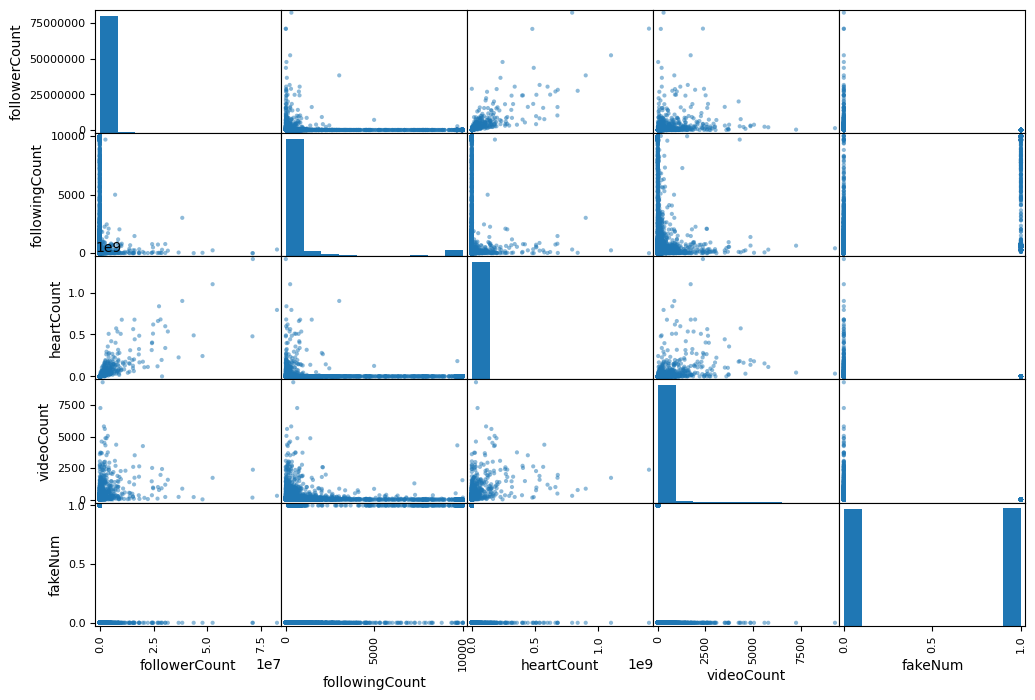

In [13]:
# Verifico la correlazione di alcuni attributi con la label target tramite scatter matrix
attributes = ['followerCount', 'followingCount', 'heartCount', 'videoCount', 'fakeNum']
scatter_matrix(df_copy[attributes], figsize=(12, 8))

## 3. Pulizia dei dati

### 3.1 Pulizia *signature*

> Sostituisce le signature con valore NaN e 'No bio yet' con la stringa vuota.

In [15]:
df_copy['signature'] = df_copy['signature'].fillna('')
df_copy['signature'] = df_copy['signature'].replace('No bio yet', '')

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        10043 non-null  int64 
 1   followerCount    10043 non-null  int64 
 2   followingCount   10043 non-null  int64 
 3   heartCount       10043 non-null  int64 
 4   videoCount       10043 non-null  int64 
 5   commentSetting   10043 non-null  int64 
 6   downloadSetting  10043 non-null  int64 
 7   duetSetting      10043 non-null  int64 
 8   nickname         10043 non-null  object
 9   openFavorite     10043 non-null  bool  
 10  signature        10043 non-null  object
 11  stitchSetting    10043 non-null  int64 
 12  uniqueId         10043 non-null  object
 13  verified         10043 non-null  bool  
 14  fake             10043 non-null  bool  
 15  fakeNum          10043 non-null  int64 
dtypes: bool(3), int64(10), object(3)
memory usage: 1.0+ MB


> Conta ed elimina le istanze con signature non in inglese.

In [17]:
indices_to_remove = []

for i, signature in enumerate(df_copy['signature']):
  if signature == '':
    continue
  try:
    language = detect(signature)
  except Exception as e:
    continue
  if language != 'en':
    indices_to_remove.append(i)

count = len(indices_to_remove)
df_copy = df_copy.drop(index=indices_to_remove).reset_index(drop=True)
print(count)

1331


In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        8712 non-null   int64 
 1   followerCount    8712 non-null   int64 
 2   followingCount   8712 non-null   int64 
 3   heartCount       8712 non-null   int64 
 4   videoCount       8712 non-null   int64 
 5   commentSetting   8712 non-null   int64 
 6   downloadSetting  8712 non-null   int64 
 7   duetSetting      8712 non-null   int64 
 8   nickname         8712 non-null   object
 9   openFavorite     8712 non-null   bool  
 10  signature        8712 non-null   object
 11  stitchSetting    8712 non-null   int64 
 12  uniqueId         8712 non-null   object
 13  verified         8712 non-null   bool  
 14  fake             8712 non-null   bool  
 15  fakeNum          8712 non-null   int64 
dtypes: bool(3), int64(10), object(3)
memory usage: 910.5+ KB


In [19]:
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake,fakeNum
0,279,0,564,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,True,1
1,1198,71,9980,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True,1
2,2968,596,1123,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False,0
3,2351,200,818,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,False,0
4,334,0,604,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True,1


### 3.2 Pulizia *diggCount*

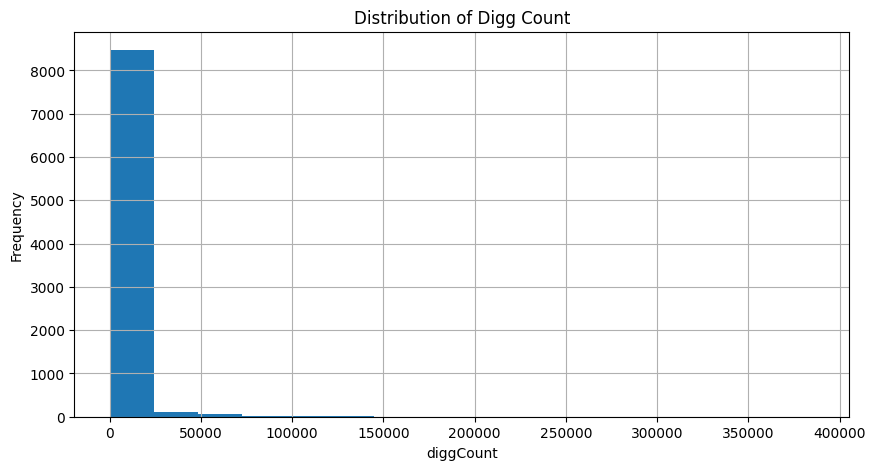

In [20]:
# Visualizziamo l'istogramma del singolo attributo
df_copy['diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('diggCount')
plt.ylabel('Frequency')
plt.title('Distribution of Digg Count')
plt.show()

In [21]:
df_copy['diggCount'].describe()

count      8712.000000
mean       2941.536731
std       14204.962815
min           0.000000
25%         214.000000
50%         350.000000
75%         517.000000
max      386100.000000
Name: diggCount, dtype: float64

#### Standardizzazione con StandardScaler

In [22]:
scaler = StandardScaler()
data = df_copy[['diggCount', 'followerCount', 'followingCount', 'heartCount', 'videoCount']]
data_scaled = scaler.fit_transform(data)
df_standardized = pd.DataFrame(data_scaled, columns=data.columns)
df_standardized.head()

,diggCount,followerCount,followingCount,heartCount,videoCount
0,-0.187448,-0.086948,-0.242942,-0.089025,-0.200941
1,-0.122748,-0.086913,3.857014,-0.089025,-0.200941
2,0.001863,-0.086654,0.000461,-0.088961,1.085558
3,-0.041575,-0.086849,-0.132344,-0.089011,-0.026828
4,-0.183576,-0.086948,-0.225525,-0.089025,-0.200941


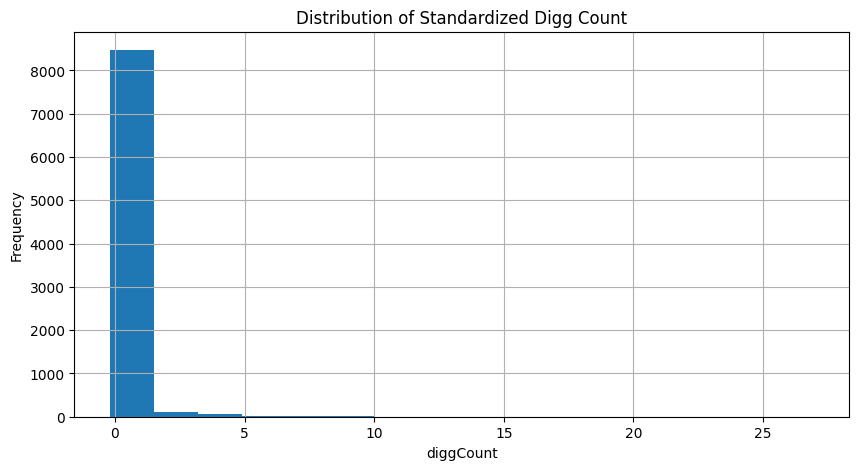

In [23]:
# Visualizziamo l'istogramma dell'attributo dopo la scalatura
df_standardized['diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('diggCount')
plt.ylabel('Frequency')
plt.title('Distribution of Standardized Digg Count')
plt.show()

In [24]:
# Verifichiamo come sono cambiati i parametri rispetto a prima
df_standardized['diggCount'].describe()

count    8.712000e+03
mean    -8.359806e-18
std      1.000057e+00
min     -2.070900e-01
25%     -1.920240e-01
50%     -1.824493e-01
75%     -1.706922e-01
max      2.697511e+01
Name: diggCount, dtype: float64

#### Quantile Transformation

In [25]:
qt = QuantileTransformer(output_distribution='uniform')
df_copy['diggCount_quantile'] = qt.fit_transform(df_copy[['diggCount']])

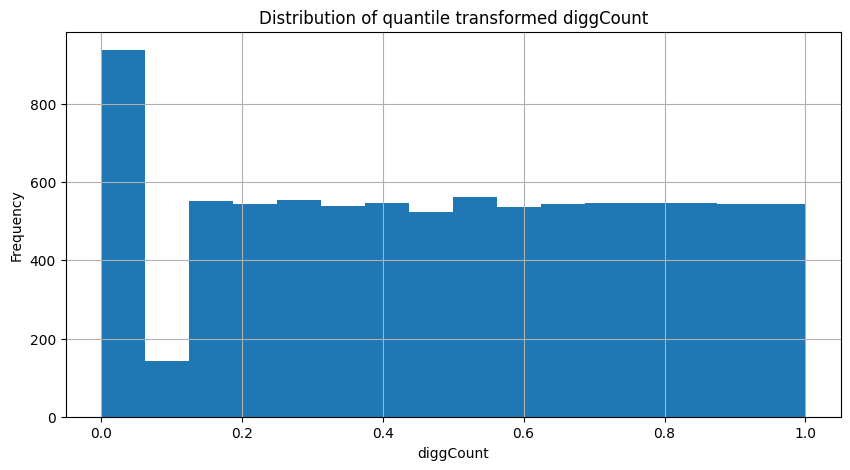

In [26]:
df_copy['diggCount_quantile'].hist(bins=16, figsize=(10,5))
plt.xlabel('diggCount')
plt.ylabel('Frequency')
plt.title('Distribution of quantile transformed diggCount')
plt.show()

In [27]:
df_copy['diggCount_quantile'].describe()

count    8712.000000
mean        0.494202
std         0.297829
min         0.000000
25%         0.250250
50%         0.500000
75%         0.750232
max         1.000000
Name: diggCount_quantile, dtype: float64

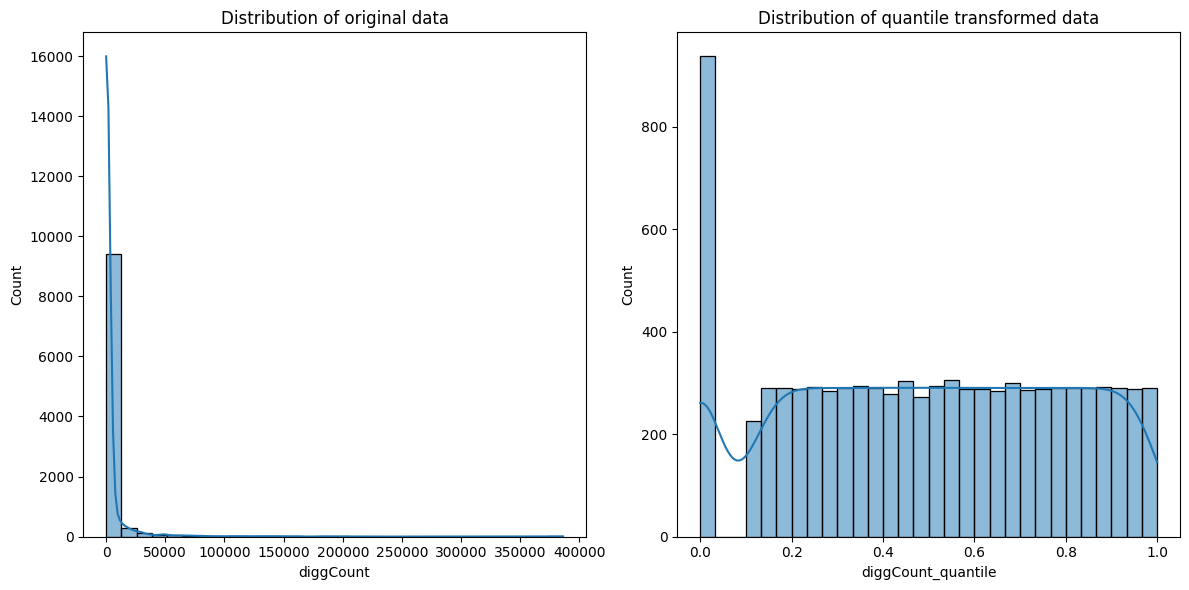

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['diggCount'], bins=30, kde=True)
plt.title('Distribution of original data')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['diggCount_quantile'], bins=30, kde=True)
plt.title('Distribution of quantile transformed data')

plt.tight_layout()
plt.show()

In [29]:
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake,fakeNum,diggCount_quantile
0,279,0,564,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,True,1,0.312312
1,1198,71,9980,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True,1,0.825606
2,2968,596,1123,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False,0,0.885495
3,2351,200,818,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,False,0,0.871872
4,334,0,604,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True,1,0.450951


#### Min-Max Scaler

In [30]:
scaler = MinMaxScaler()
df_copy['diggCount_minMax'] = scaler.fit_transform(df_copy[['diggCount']])

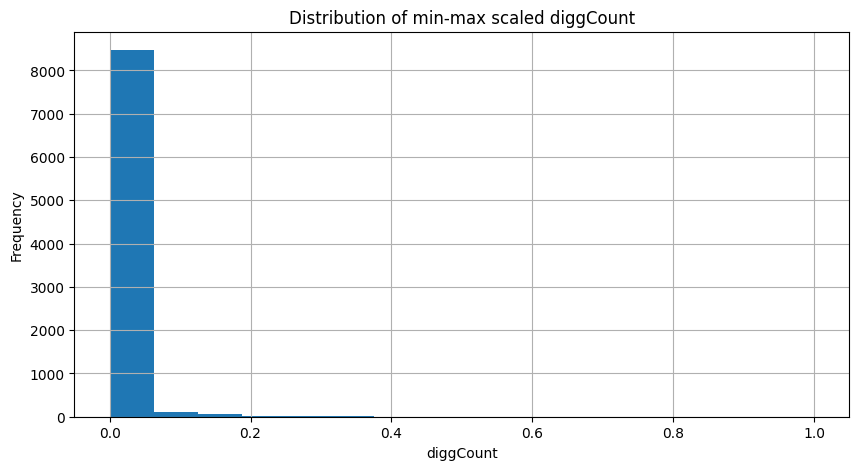

In [31]:
df_copy['diggCount_minMax'].hist(bins=16, figsize=(10,5))
plt.xlabel('diggCount')
plt.ylabel('Frequency')
plt.title('Distribution of min-max scaled diggCount')
plt.show()

In [32]:
df_copy['diggCount_minMax'].describe()

count    8712.000000
mean        0.007619
std         0.036791
min         0.000000
25%         0.000554
50%         0.000907
75%         0.001339
max         1.000000
Name: diggCount_minMax, dtype: float64

In [33]:
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake,fakeNum,diggCount_quantile,diggCount_minMax
0,279,0,564,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,True,1,0.312312,0.000723
1,1198,71,9980,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True,1,0.825606,0.003103
2,2968,596,1123,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False,0,0.885495,0.007687
3,2351,200,818,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,False,0,0.871872,0.006089
4,334,0,604,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True,1,0.450951,0.000865




---



Per migliorare le prestazioni degli algoritmi di Machine Learning, la deviazione standard deve essere ad 1. Per cui, per i restanti attributi con valori enormi, si è proceduto a considerare solo lo Standard Scaler.

In [34]:
# Memorizzo i valori standardizzati in 'diggCount'
df_copy['diggCount'] = df_standardized['diggCount'].values

In [35]:
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake,fakeNum,diggCount_quantile,diggCount_minMax
0,-0.187448,0,564,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,True,1,0.312312,0.000723
1,-0.122748,71,9980,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True,1,0.825606,0.003103
2,0.001863,596,1123,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False,0,0.885495,0.007687
3,-0.041575,200,818,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,False,0,0.871872,0.006089
4,-0.183576,0,604,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True,1,0.450951,0.000865


### 3.3 Pulizia *followerCount*

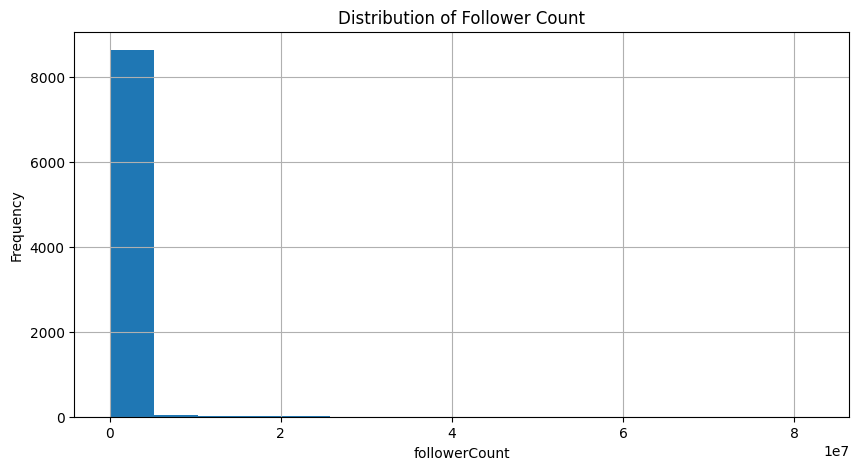

In [36]:
# Visualizziamo l'istogramma del singolo attributo
df_copy['followerCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('followerCount')
plt.ylabel('Frequency')
plt.title('Distribution of Follower Count')
plt.show()

In [37]:
df_copy['followerCount'].describe()

count    8.712000e+03
mean     1.760103e+05
std      2.024428e+06
min      0.000000e+00
25%      1.000000e+00
50%      9.000000e+00
75%      2.752500e+02
max      8.230000e+07
Name: followerCount, dtype: float64

Essendo che nello StandardScaler considerato prima, abbiamo ottenuto anche i valori di questo attributo, li assegniamo come fatto anche per *diggCount*.

In [38]:
# Memorizzo i valori standardizzati in 'followerCount'
df_copy['followerCount'] = df_standardized['followerCount'].values

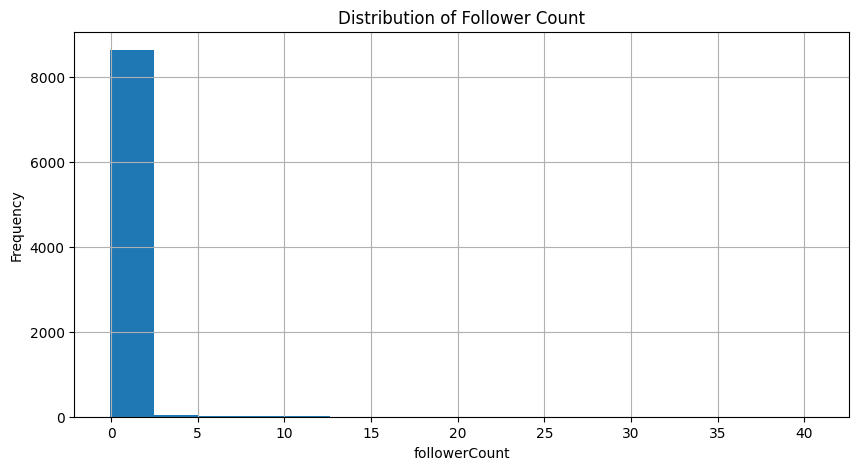

In [39]:
# Visualizziamo l'istogramma dell'attributo dopo la modifica
df_copy['followerCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('followerCount')
plt.ylabel('Frequency')
plt.title('Distribution of Follower Count')
plt.show()

In [40]:
df_copy['followerCount'].describe()

count    8.712000e+03
mean     2.038977e-18
std      1.000057e+00
min     -8.694820e-02
25%     -8.694771e-02
50%     -8.694376e-02
75%     -8.681223e-02
max      4.056884e+01
Name: followerCount, dtype: float64

### 3.5 Pulizia *followingCount*

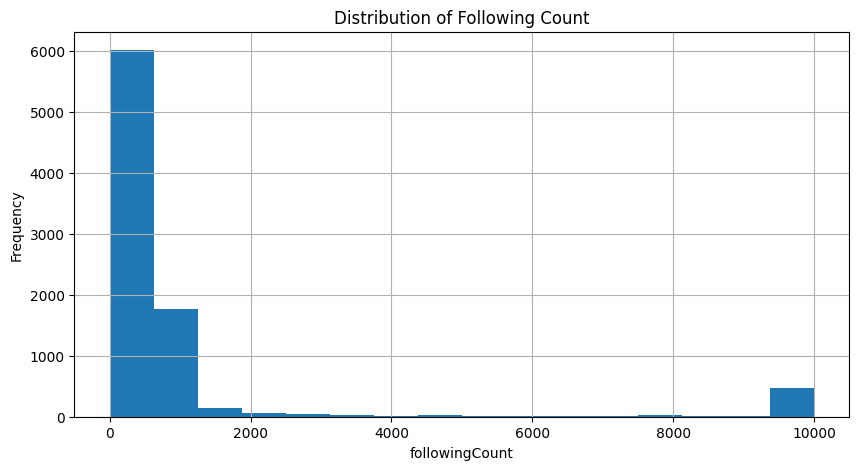

In [41]:
# Visualizziamo l'istogramma del singolo attributo
df_copy['followingCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('followingCount')
plt.ylabel('Frequency')
plt.title('Distribution of Following Count')
plt.show()

In [42]:
df_copy['followingCount'].describe()

count     8712.000000
mean      1121.942034
std       2296.741926
min          0.000000
25%        247.000000
50%        540.000000
75%        691.000000
max      10000.000000
Name: followingCount, dtype: float64

Essendo che nello StandardScaler considerato prima, abbiamo ottenuto anche i valori di questo attributo, li assegniamo come fatto anche per diggCount.

In [43]:
# Memorizzo i valori standardizzati in 'followingCount'
df_copy['followingCount'] = df_standardized['followingCount'].values

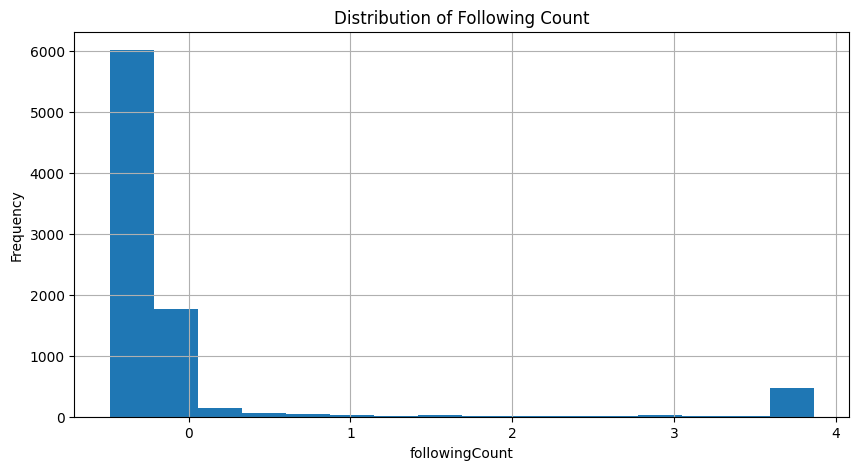

In [44]:
# Visualizziamo l'istogramma del singolo attributo
df_copy['followingCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('followingCount')
plt.ylabel('Frequency')
plt.title('Distribution of Following Count')
plt.show()

In [45]:
df_copy['followingCount'].describe()

count    8.712000e+03
mean     3.894446e-17
std      1.000057e+00
min     -4.885209e-01
25%     -3.809711e-01
50%     -2.533917e-01
75%     -1.876427e-01
max      3.865723e+00
Name: followingCount, dtype: float64

### 3.6 Pulizia *heartCount*

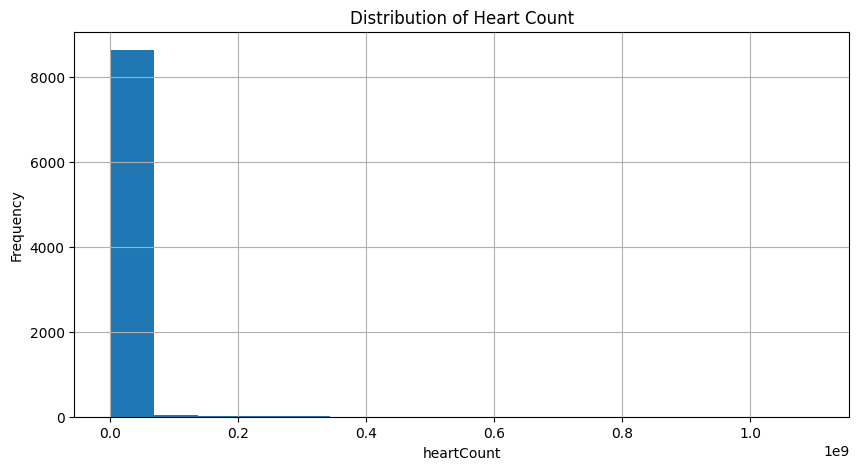

In [46]:
# Visualizziamo l'istogramma del singolo attributo
df_copy['heartCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('heartCount')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Count')
plt.show()

In [47]:
df_copy['heartCount'].describe()

count    8.712000e+03
mean     2.874989e+06
std      3.229615e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.600000e+02
max      1.100000e+09
Name: heartCount, dtype: float64

Essendo che nello StandardScaler considerato prima, abbiamo ottenuto anche i valori di questo attributo, li assegniamo come fatto anche per diggCount.

In [48]:
# Memorizzo i valori standardizzati in 'heartCount'
df_copy['heartCount'] = df_standardized['heartCount'].values

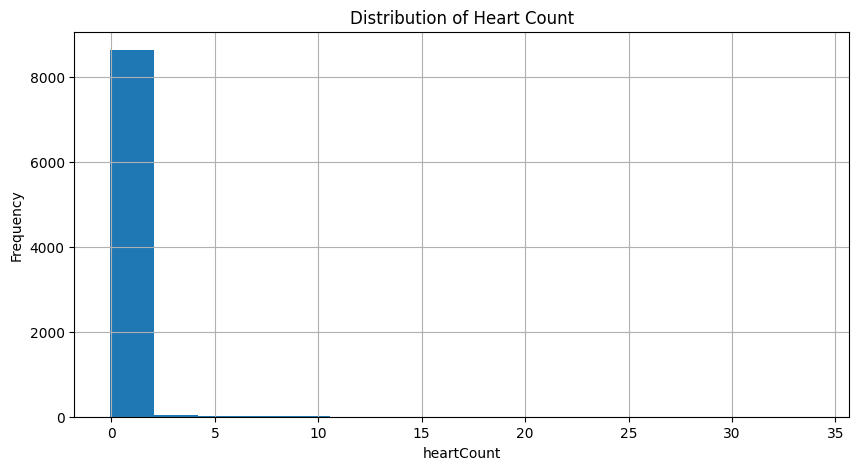

In [49]:
# Visualizziamo l'istogramma del singolo attributo
df_copy['heartCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('heartCount')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Count')
plt.show()

In [50]:
df_copy['heartCount'].describe()

count    8.712000e+03
mean     3.874056e-18
std      1.000057e+00
min     -8.902466e-02
25%     -8.902466e-02
50%     -8.902466e-02
75%     -8.901971e-02
max      3.397272e+01
Name: heartCount, dtype: float64

### 3.7 Pulizia *videoCount*

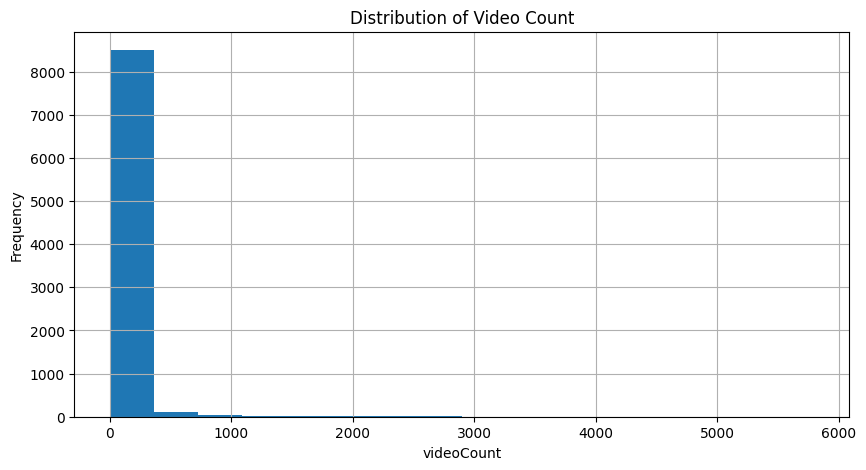

In [51]:
# Visualizziamo l'istogramma del singolo attributo
df_copy['videoCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('videoCount')
plt.ylabel('Frequency')
plt.title('Distribution of Video Count')
plt.show()

In [52]:
df_copy['videoCount'].describe()

count    8712.000000
mean       41.547062
std       206.774548
min         0.000000
25%         0.000000
50%         0.000000
75%        11.000000
max      5799.000000
Name: videoCount, dtype: float64

Essendo che nello StandardScaler considerato prima, abbiamo ottenuto anche i valori di questo attributo, li assegniamo come fatto anche per diggCount.

In [53]:
# Memorizzo i valori standardizzati in 'videoCount'
df_copy['videoCount'] = df_standardized['videoCount'].values

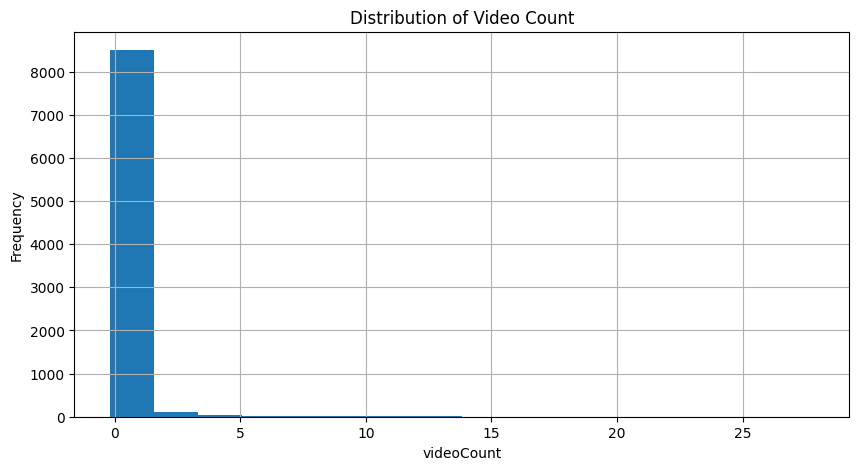

In [54]:
# Visualizziamo l'istogramma del singolo attributo
df_copy['videoCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('videoCount')
plt.ylabel('Frequency')
plt.title('Distribution of Video Count')
plt.show()

In [55]:
df_copy['videoCount'].describe()

count    8.712000e+03
mean    -3.241974e-17
std      1.000057e+00
min     -2.009408e-01
25%     -2.009408e-01
50%     -2.009408e-01
75%     -1.477397e-01
max      2.784571e+01
Name: videoCount, dtype: float64

## 4. Rimozione feature

> Si procede a rilevare la matrice delle correlazioni dopo la pulizia, e verificare se l'attributo *commentSetting* è ancora poco correlato.

In [56]:
# Seleziono solo le colonne numeriche, dato che su quelle si può calcolare la matrice di correlazione
selected_data = df[['diggCount', 'followerCount', 'followingCount', 'heartCount',
                      'videoCount', 'commentSetting', 'downloadSetting', 'duetSetting', 'stitchSetting', 'fake']]
corr_matrix = selected_data.corr()
corr_matrix['fake'].sort_values(ascending=False)

fake               1.000000
followingCount     0.250169
commentSetting    -0.067205
followerCount     -0.102048
heartCount        -0.104520
duetSetting       -0.186717
stitchSetting     -0.190654
diggCount         -0.204800
videoCount        -0.210097
downloadSetting   -0.227304
Name: fake, dtype: float64

L'assenza di correlazione si è verificata anche dopo la pulizia, per cui si procede a rimuovere l'attributo.

In [57]:
df_copy = df_copy.drop(labels='commentSetting', axis=1)
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake,fakeNum,diggCount_quantile,diggCount_minMax
0,-0.187448,-0.086948,-0.242942,-0.089025,-0.200941,0,0,Tik Toker,False,,0,gyzituvigy542,False,True,1,0.312312,0.000723
1,-0.122748,-0.086913,3.857014,-0.089025,-0.200941,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True,1,0.825606,0.003103
2,0.001863,-0.086654,0.000461,-0.088961,1.085558,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False,0,0.885495,0.007687
3,-0.041575,-0.086849,-0.132344,-0.089011,-0.026828,0,0,clemevitale,False,,0,clemevitale,False,False,0,0.871872,0.006089
4,-0.183576,-0.086948,-0.225525,-0.089025,-0.200941,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True,1,0.450951,0.000865


Elimino anche le colonne *diggCount_quantile* e *diggCount_minMax*, create per effettuare le prove precedenti.

In [58]:
df_copy = df_copy.drop(labels='diggCount_quantile', axis=1)
df_copy = df_copy.drop(labels='diggCount_minMax', axis=1)
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake,fakeNum
0,-0.187448,-0.086948,-0.242942,-0.089025,-0.200941,0,0,Tik Toker,False,,0,gyzituvigy542,False,True,1
1,-0.122748,-0.086913,3.857014,-0.089025,-0.200941,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True,1
2,0.001863,-0.086654,0.000461,-0.088961,1.085558,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False,0
3,-0.041575,-0.086849,-0.132344,-0.089011,-0.026828,0,0,clemevitale,False,,0,clemevitale,False,False,0
4,-0.183576,-0.086948,-0.225525,-0.089025,-0.200941,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True,1


Infine, elimino *fakeNum*, colonna creata precedentemente per verificare le correlazioni con la label target.

In [65]:
df_copy = df_copy.drop(labels='fakeNum', axis=1)
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake
0,-0.187448,-0.086948,-0.242942,-0.089025,-0.200941,0,0,Tik Toker,False,,0,gyzituvigy542,False,True
1,-0.122748,-0.086913,3.857014,-0.089025,-0.200941,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True
2,0.001863,-0.086654,0.000461,-0.088961,1.085558,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False
3,-0.041575,-0.086849,-0.132344,-0.089011,-0.026828,0,0,clemevitale,False,,0,clemevitale,False,False
4,-0.183576,-0.086948,-0.225525,-0.089025,-0.200941,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True


## 5. Salvataggio dataset pulito

In [66]:
# Salvo il file in CSV (drive)
df_copy.to_csv('/content/drive/MyDrive/Progetto_FDSML/cleaned_dataset.csv', index=False)

In [ ]:
# Salvo il file in CSV (locale)
df_copy.to_csv('./datasets/cleaned_dataset.csv', index=False)